In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, f1_score, confusion_matrix, precision_recall_curve, average_precision_score, roc_auc_score

snr_list = ['6_dB', '-6_dB', '0_dB']

def read_csv_files(pattern='anomaly_score_*.csv', test=False):
    if test:
        return glob.glob(os.path.join('test', pattern))
    else:
        return glob.glob(os.path.join(pattern))
    
# 파일 이름에서 레이블을 결정하는 함수
def get_label(filename):
    if 'abnormal' in filename:
        return 1
    else:
        return 0

def get_labels_and_scores(csv_files):
    actual_labels = []
    anomaly_scores = []
    for file in csv_files:
        df = pd.read_csv(file, header=None)
        df.columns = ['filename', 'anomaly_score']
        df['label'] = df['filename'].apply(get_label)
        actual_labels.extend(df['label'].tolist())
        anomaly_scores.extend(df['anomaly_score'].tolist())
    return pd.Series(actual_labels), pd.Series(anomaly_scores)



In [2]:
def get_labels_and_scores_n(csv_files):
    actual_labels = []
    anomaly_scores = []
    normal_anomaly_scores = []
    abnormal_scores = []
    for file in csv_files:
        df = pd.read_csv(file, header=None)
        df.columns = ['filename', 'anomaly_score']
        df['label'] = df['filename'].apply(get_label)
        actual_labels.extend(df['label'].tolist())
        anomaly_scores.extend(df['anomaly_score'].tolist())

        normal_scores = df[df['label'] == 0]['anomaly_score']
        abnormal_score = df[df['label']==1]['anomaly_score']
        if not normal_scores.empty:
            normal_anomaly_scores.extend(normal_scores.tolist())
        abnormal_scores.extend(abnormal_score)
    return actual_labels, anomaly_scores, normal_anomaly_scores, abnormal_scores

['test/anomaly_score_fan_id_02.csv', 'test/anomaly_score_fan_id_06.csv', 'test/anomaly_score_pump_id_02.csv', 'test/anomaly_score_pump_id_06.csv', 'test/anomaly_score_slider_id_02.csv', 'test/anomaly_score_slider_id_06.csv', 'test/anomaly_score_valve_id_02.csv', 'test/anomaly_score_valve_id_06.csv']
3058
1529
1529
0.8566457256930647
(1529,)
(1529,)


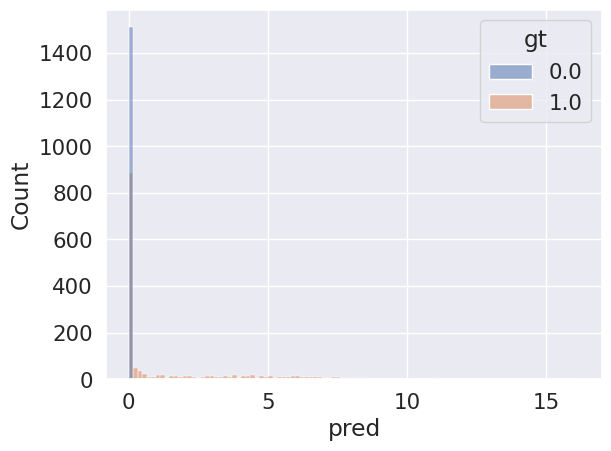

In [11]:
def draw_anomaly_score(anomaly_scores, abnormal_scores):
    anomaly_scores = np.array(anomaly_scores)
    abnormal_scores = np.array(abnormal_scores)

    print(anomaly_scores.shape)
    print(abnormal_scores.shape)

    normal_labels = np.zeros_like(anomaly_scores)
    abnormal_labels = np.zeros_like(abnormal_scores) + 1

    scores = np.hstack((anomaly_scores, abnormal_scores)).tolist()
    labels = np.hstack((normal_labels, abnormal_labels)).tolist()

    target_df = pd.DataFrame({"pred": scores, "gt": labels})
    # target_df = target_df[target_df["pred"] < 0.00002]

    sns.histplot(data=target_df, hue="gt", x="pred", bins=100)

def process_anomaly_score(test=False):
    csv_files = read_csv_files(test=test)
    print(sorted(csv_files))
    actual_labels, tot, normal_anomaly_scores, abnormal_scores = get_labels_and_scores_n(csv_files)
    print(len(tot))
    print(len(normal_anomaly_scores))
    print(len(abnormal_scores))
    auc = roc_auc_score(actual_labels, tot)
    print(auc)
    draw_anomaly_score(normal_anomaly_scores, abnormal_scores)
    

process_anomaly_score(test=True)

In [12]:
# def calculate_metrics(dic, actual_labels, anomaly_scores):
#     optimal_threshold = 5
#     predicted_labels = (anomaly_scores > optimal_threshold).astype(int)
#     fpr, tpr, thresholds = roc_curve(actual_labels, anomaly_scores)
#     auc = roc_auc_score(actual_labels, anomaly_scores)
#     f1 = f1_score(actual_labels, predicted_labels)
#     optimal_idx = np.argmin(np.abs(thresholds - optimal_threshold))
#     return predicted_labels, optimal_threshold, f1, auc, fpr, tpr, optimal_idx

# def draw_confusion_matrix(actual_labels, predicted_labels, test=False):
#     cm = confusion_matrix(actual_labels, predicted_labels, normalize='true')
#     plt.figure(figsize=(10, 7))
#     sns.set(font_scale=1.4)
#     sns.heatmap(cm, annot=True, fmt='.3f', cmap='Blues', xticklabels=['normal', 'abnormal'],
#                 yticklabels=['normal', 'abnormal'], annot_kws={"size":20})
#     plt.xlabel('Predicted Label', fontsize=20)
#     plt.ylabel('True Label', fontsize=20)

#     if test:
#         plt.title(f'/test', pad=20, fontsize=20)
#         plt.tight_layout()
#         plt.show()
#     else:

#         plt.tight_layout()
#         plt.show()
#     plt.close() 


# def draw_roc_curve(fpr, tpr, auc, optimal_idx, optimal_threshold, test=False):
#     plt.figure(figsize=(10, 7))
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate', fontsize=14)
#     plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold: {optimal_threshold:.2f}')
#     plt.ylabel('True Positive Rate', fontsize=14)
#     plt.title('Receiver Operating Characteristic', fontsize=16)
#     plt.legend(loc="lower right")

#     if test:
#         plt.title(f'/test', pad=20, fontsize=20)
#         plt.tight_layout()
#         plt.show()
#     else:

#         plt.tight_layout()
#         plt.show()
    
#     plt.close() 

# def use_eye(dic, test=False):
#     if test and not os.path.isdir('./testfig'):
#         os.mkdir('./testfig')
#     csv_files = read_csv_files(test=test)
#     actual_labels, anomaly_scores = get_labels_and_scores(csv_files)
#     results = calculate_metrics(dic, actual_labels, anomaly_scores)
#     predicted_labels, optimal_threshold, f1, auc, fpr, tpr, optimal_idx = results

#     print(f'Optimal threshold: {optimal_threshold}')
#     print(f'F1 Score: {f1}')
#     print(f'AUC: {auc}')
    
#     draw_confusion_matrix(actual_labels, predicted_labels, test)
#     draw_roc_curve(fpr, tpr, auc, optimal_idx, optimal_threshold, test)
    
#     return results

# dic = {
#     '-6_dB' : 0.55,
#     '0_dB'  : 0.4,
#     '6_dB'  : 0.22
#     }


# use_eye(dic, test=False)


[ 1.72077270e+01  1.62077270e+01  7.79623750e+00  7.78794670e+00
  7.36341140e+00  7.34318450e+00  4.93061100e+00  4.91989200e+00
  4.76361660e+00  4.75989500e+00  4.16446730e+00  4.16227630e+00
  2.06113900e+00  2.05410150e+00  2.04614520e+00  2.03079680e+00
  1.55290520e+00  1.54312870e+00  1.47460070e+00  1.46283320e+00
  1.28341020e+00  1.25868090e+00  1.06309800e+00  1.04859480e+00
  6.75013540e-01  6.27734700e-01  5.48624900e-01  5.25569440e-01
  3.87935800e-01  3.81151740e-01  3.79128600e-01  3.72572900e-01
  2.92496860e-01  2.91028350e-01  2.71919370e-01  2.70853760e-01
  1.73676240e-01  1.73400940e-01  1.54158920e-01  1.53783960e-01
  1.48534550e-01  1.43187310e-01  1.28953640e-01  1.28201830e-01
  1.01751530e-01  9.97246300e-02  9.88699500e-02  9.26808940e-02
  8.97781400e-02  8.92266900e-02  8.84676400e-02  8.74676300e-02
  8.03318840e-02  7.97672800e-02  7.85081700e-02  7.75854100e-02
  7.26784900e-02  7.19748800e-02  5.79623500e-02  5.79304000e-02
  5.55013980e-02  5.52206

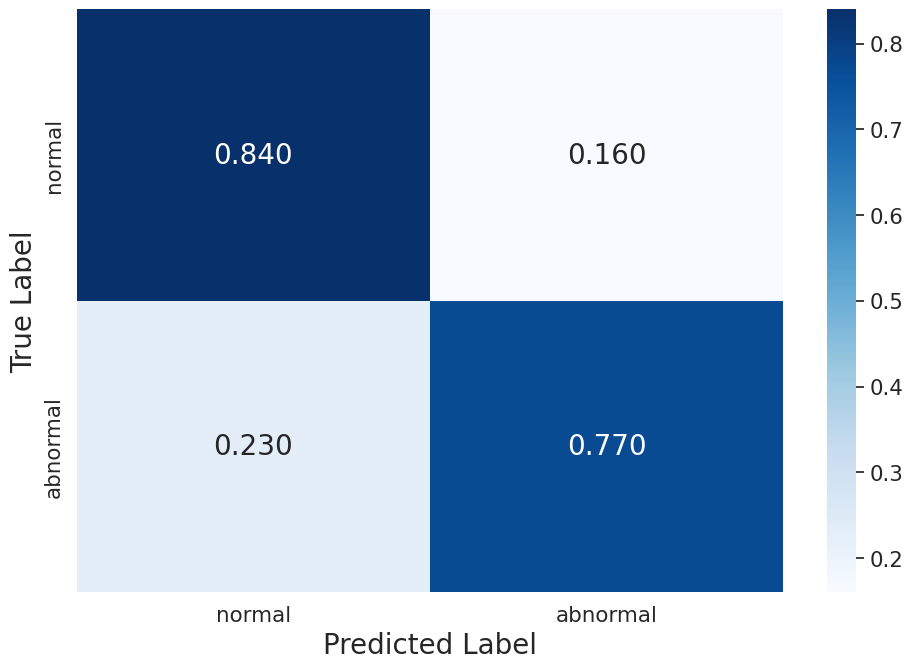

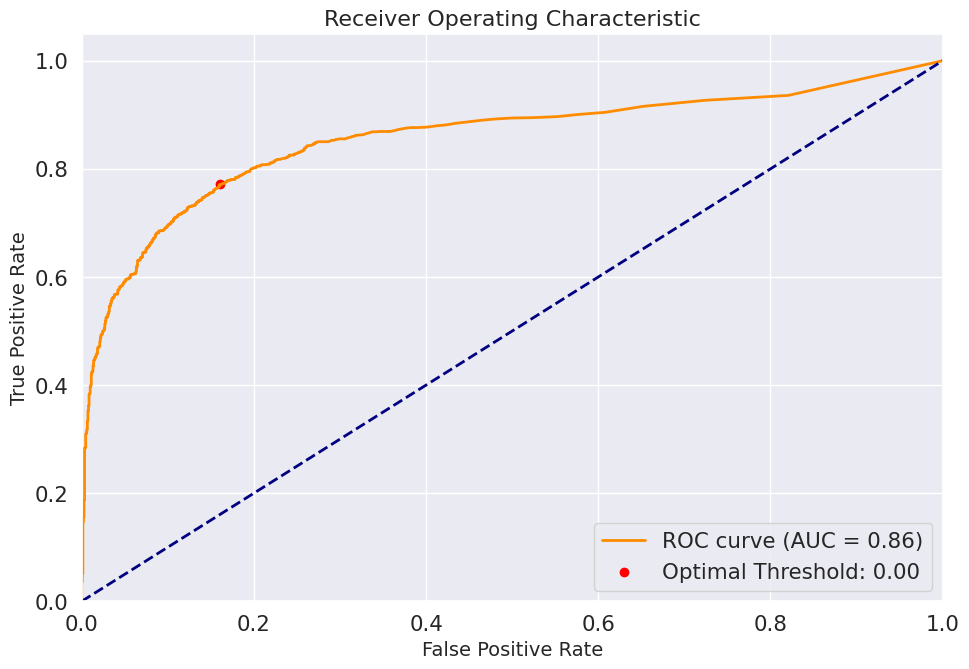

(0       0
 1       1
 2       1
 3       1
 4       1
        ..
 3053    0
 3054    0
 3055    0
 3056    0
 3057    0
 Length: 3058, dtype: int64,
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.54022237e-04,
        6.54022237e-04, 1.30804447e-03, 1.30804447e-03, 1.96206671e-03,
        1.96206671e-03, 2.61608895e-03, 2.61608895e-03, 3.27011118e-03,
        3.27011118e-03, 3.92413342e-03, 3.92413342e-03, 4.57815566e-03,
        4.57815566e-03, 5.23217789e-03, 5.23217789e-03, 5.88620013e-03,
        5.88620013e-03, 6.54022237e-03, 6.54022237e-03, 7.19424460e-03,
        7.19424460e-03, 7.84826684e-03, 7.84826684e-03, 8.50228908e-03,
        8.50228908e-03, 9.15631131e-03, 9.15631131e-03, 9.81033355e-03,
        9.81033355e-03, 1.04643558e-02, 1.04643558e-02, 1.11183780e-02,
        1.11183780e-02, 1.17724003e-02, 1.17724003e-02, 1.24264225e-02,
        1.24264225e-02, 1.30804447e-02, 1.30804447e-02, 1.37344670e-02,
        1.37344670e-02, 1.43884892e-02, 1.43884892e-02, 1.

In [13]:
def calculate_metrics(actual_labels, anomaly_scores):
    fpr, tpr, thresholds = roc_curve(actual_labels, anomaly_scores)
    print(thresholds)
    roc_auc = auc(fpr, tpr)
    J = tpr - fpr
    optimal_idx = np.argmax(J)
    optimal_threshold = thresholds[optimal_idx]
    predicted_labels = (anomaly_scores > optimal_threshold).astype(int)
    f1 = f1_score(actual_labels, predicted_labels)
    return predicted_labels, fpr, tpr, optimal_idx, roc_auc, optimal_threshold, f1

def draw_confusion_matrix(actual_labels, predicted_labels, test=False):
    cm = confusion_matrix(actual_labels, predicted_labels, normalize='true')
    plt.figure(figsize=(10, 7))
    sns.set(font_scale=1.4)
    sns.heatmap(cm, annot=True, fmt='.3f', cmap='Blues', xticklabels=['normal', 'abnormal'],
                yticklabels=['normal', 'abnormal'], annot_kws={"size":20})
    plt.xlabel('Predicted Label', fontsize=20)
    plt.ylabel('True Label', fontsize=20)

    if test:
        plt.tight_layout()
        plt.show()
    else:
        plt.tight_layout()
        plt.show()
    plt.close() 

def draw_roc_curve(fpr, tpr, roc_auc, optimal_idx, optimal_threshold, test=False):
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold: {optimal_threshold:.2f}')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver Operating Characteristic', fontsize=16)
    plt.legend(loc="lower right")

    if test:
        plt.tight_layout()
        plt.show()
    else:
        plt.tight_layout()
        plt.show()
    
    plt.close() 

def use_Youden_inede(test=False):
    csv_files = read_csv_files(test=test)
    actual_labels, anomaly_scores = get_labels_and_scores(csv_files)
    results = calculate_metrics(actual_labels, anomaly_scores)
    predicted_labels, fpr, tpr, optimal_idx, roc_auc, optimal_threshold, f1 = results
    
    # print(f'Optimal threshold: {optimal_threshold}')
    # print(f'F1 Score: {f1}')
    
    draw_confusion_matrix(actual_labels, predicted_labels, test)
    draw_roc_curve(fpr, tpr, roc_auc, optimal_idx, optimal_threshold, test)
    
    return results

use_Youden_inede(test=True)

In [14]:
# def calculate_metrics(actual_labels, anomaly_scores):
#     fpr, tpr, thresholds = roc_curve(actual_labels, anomaly_scores)
#     roc_auc = auc(fpr, tpr)
#     J = tpr - fpr
#     optimal_idx = np.argmax(J)
#     optimal_threshold = thresholds[optimal_idx]
#     predicted_labels = (anomaly_scores > optimal_threshold).astype(int)
#     f1 = f1_score(actual_labels, predicted_labels)
#     return predicted_labels, fpr, tpr, optimal_idx, roc_auc, optimal_threshold, f1

# def draw_confusion_matrix(actual_labels, predicted_labels, test=False):
#     cm = confusion_matrix(actual_labels, predicted_labels, normalize='true')
#     plt.figure(figsize=(10, 7))
#     sns.set(font_scale=1.4)
#     sns.heatmap(cm, annot=True, fmt='.3f', cmap='Blues', xticklabels=['normal', 'abnormal'],
#                 yticklabels=['normal', 'abnormal'], annot_kws={"size":20})
#     plt.xlabel('Predicted Label', fontsize=20)
#     plt.ylabel('True Label', fontsize=20)

#     if test:
#         plt.tight_layout()
#         plt.show()
#     else:
#         plt.tight_layout()
#         plt.show()
#     plt.close() 

# def draw_roc_curve(fpr, tpr, roc_auc, optimal_idx, optimal_threshold, test=False):
#     plt.figure(figsize=(10, 7))
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold: {optimal_threshold:.2f}')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate', fontsize=14)
#     plt.ylabel('True Positive Rate', fontsize=14)
#     plt.title('Receiver Operating Characteristic', fontsize=16)
#     plt.legend(loc="lower right")

#     if test:
#         plt.tight_layout()
#         plt.show()
#     else:
#         plt.tight_layout()
#         plt.show()
    
#     plt.close() 

# def use_Youden_inede(test=False):
#     csv_files = read_csv_files(test=test)
#     actual_labels, anomaly_scores = get_labels_and_scores(csv_files)
#     results = calculate_metrics(actual_labels, anomaly_scores)
#     predicted_labels, fpr, tpr, optimal_idx, roc_auc, optimal_threshold, f1 = results
    
#     print(f'Optimal threshold: {optimal_threshold}')
#     print(f'F1 Score: {f1}')
    
#     draw_confusion_matrix(actual_labels, predicted_labels, test)
#     draw_roc_curve(fpr, tpr, roc_auc, optimal_idx, optimal_threshold, test)
    
#     return results

# use_Youden_inede(test=False)

Z-Score Threshold: 1
F1 Score: 0.5507518796992481


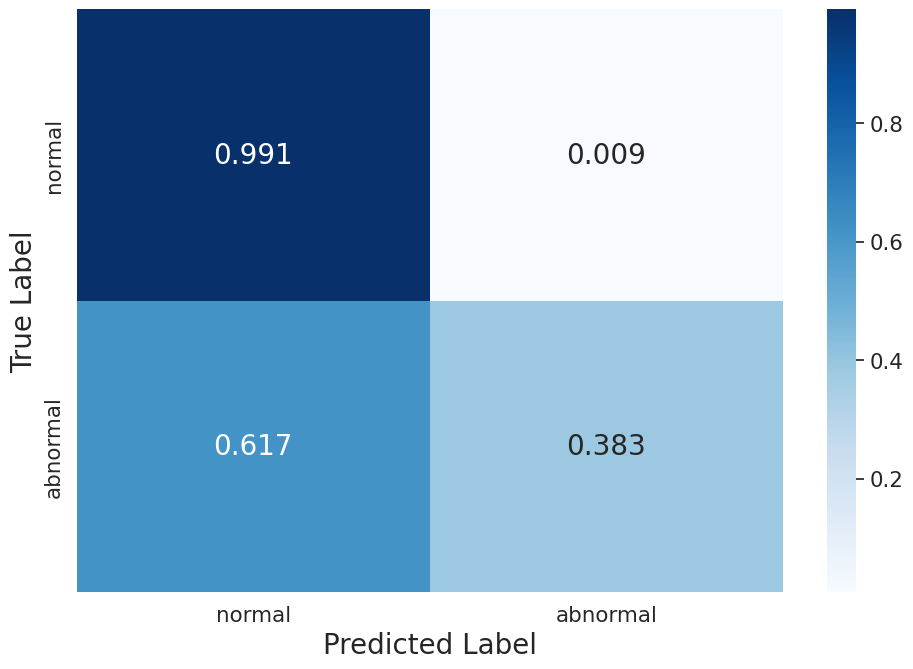

(array([0, 0, 0, ..., 0, 0, 0]), 1, 0.5507518796992481)

In [26]:
def calculate_metrics_zscore(actual_labels, normal_anomaly_scores, anomaly_scores, z_threshold=1):
    normal_mean = np.mean(normal_anomaly_scores)
    normal_std = np.std(normal_anomaly_scores)

    # Z-Score 계산
    z_scores = (anomaly_scores - normal_mean) / normal_std
    # Z-Score를 기준으로 이상 감지
    predicted_labels = (z_scores > z_threshold).astype(int)

    # F1 Score 계산
    f1 = f1_score(actual_labels, predicted_labels)

    return predicted_labels, z_threshold, f1

def draw_confusion_matrix(actual_labels, predicted_labels, test=False):
    cm = confusion_matrix(actual_labels, predicted_labels, normalize='true')
    plt.figure(figsize=(10, 7))
    sns.set(font_scale=1.4)
    sns.heatmap(cm, annot=True, fmt='.3f', cmap='Blues', xticklabels=['normal', 'abnormal'],
                yticklabels=['normal', 'abnormal'], annot_kws={"size":20})
    plt.xlabel('Predicted Label', fontsize=20)
    plt.ylabel('True Label', fontsize=20)

    if test:
        plt.tight_layout()
        plt.show()
    else:
        plt.tight_layout()
        plt.show()
    plt.close() 

def use_zscore(test=False):
    csv_files = read_csv_files(test=test)
    actual_labels, tot, normal_anomaly_scores, abnormal_scores = get_labels_and_scores_n(csv_files)
    results = calculate_metrics_zscore(actual_labels, normal_anomaly_scores, tot)
    predicted_labels, z_threshold, f1 = results
    
    print(f'Z-Score Threshold: {z_threshold}')
    print(f'F1 Score: {f1}')
    
    draw_confusion_matrix(actual_labels, predicted_labels, test)
    
    return results


use_zscore(test=True)


Z-Score Threshold: 3.5
F1 Score: 0.7915407854984893


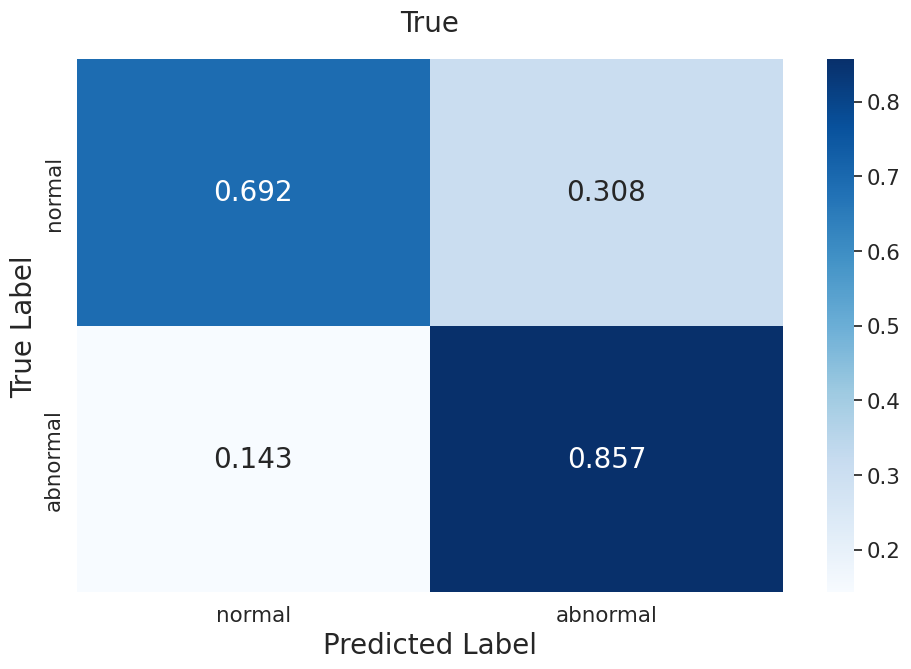

(array([1, 1, 1, ..., 0, 0, 0]), 3.5, 0.7915407854984893)

In [18]:
def calculate_metrics_modified_zscore(actual_labels, anomaly_scores, normal_anomaly_scoresm, z_threshold=3.5):
    median = np.median(normal_anomaly_scoresm)
    median_absolute_deviation = np.median(np.abs(normal_anomaly_scoresm-median))

    # Z-Score 계산
    modified_z_scores = 0.6745*(anomaly_scores - median) / median_absolute_deviation
    # Z-Score를 기준으로 이상 감지
    predicted_labels = (np.abs(modified_z_scores) > z_threshold).astype('int')

    # F1 Score 계산
    f1 = f1_score(actual_labels, predicted_labels)

    return predicted_labels, z_threshold, f1
    

def draw_confusion_matrix(actual_labels, predicted_labels, snr, test=False):
    cm = confusion_matrix(actual_labels, predicted_labels, normalize='true')
    plt.figure(figsize=(10, 7))
    sns.set(font_scale=1.4)
    sns.heatmap(cm, annot=True, fmt='.3f', cmap='Blues', xticklabels=['normal', 'abnormal'],
                yticklabels=['normal', 'abnormal'], annot_kws={"size":20})
    plt.xlabel('Predicted Label', fontsize=20)
    plt.ylabel('True Label', fontsize=20)

    if test:
        plt.title(f'{snr}/test', pad=20, fontsize=20)
        plt.tight_layout()
        plt.show()
    else:
        plt.title(f'{snr}', pad=20, fontsize=20)
        plt.tight_layout()
        plt.show()
    plt.close() 

def use_modified_zscore(test=False):
    csv_files = read_csv_files(test=test)
    actual_labels, tot, normal_anomaly_scores, abnormal_scores = get_labels_and_scores_n(csv_files)
    results = calculate_metrics_modified_zscore(actual_labels, tot, normal_anomaly_scores)
    predicted_labels, z_threshold, f1 = results
    
    print(f'Z-Score Threshold: {z_threshold}')
    print(f'F1 Score: {f1}')
    
    draw_confusion_matrix(actual_labels, predicted_labels, test)
    
    return results

use_modified_zscore(test=True)


In [11]:
# def calculate_metrics_IQR(actual_labels, anomaly_scores, z_threshold=3.5):
#     quartile_1, quartile_3 = np.percentile(anomaly_scores, [25, 75])
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)


#     predicted_labels = ((anomaly_scores > upper_bound) | (anomaly_scores < lower_bound)).astype('int')

#     # F1 Score 계산
#     f1 = f1_score(actual_labels, predicted_labels)

#     return predicted_labels, z_threshold, f1
    

# def draw_confusion_matrix(actual_labels, predicted_labels, snr, test=False):
#     cm = confusion_matrix(actual_labels, predicted_labels, normalize='true')
#     plt.figure(figsize=(10, 7))
#     sns.set(font_scale=1.4)
#     sns.heatmap(cm, annot=True, fmt='.3f', cmap='Blues', xticklabels=['normal', 'abnormal'],
#                 yticklabels=['normal', 'abnormal'], annot_kws={"size":20})
#     plt.xlabel('Predicted Label', fontsize=20)
#     plt.ylabel('True Label', fontsize=20)

#     if test:
#         plt.title(f'{snr}/test', pad=20, fontsize=20)
#         plt.tight_layout()
#         plt.show()
#     else:
#         plt.title(f'{snr}', pad=20, fontsize=20)
#         plt.tight_layout()
#         plt.show()
#     plt.close() 

# def use_IQR(snr, test=False):
#     csv_files = read_csv_files(snr, test=test)
#     actual_labels, anomaly_scores = get_labels_and_scores(csv_files)
#     results = calculate_metrics_IQR(actual_labels, anomaly_scores)
#     predicted_labels, z_threshold, f1 = results
    
#     print(f'SNR: {snr}')
#     print(f'Z-Score Threshold: {z_threshold}')
#     print(f'F1 Score: {f1}')
    
#     draw_confusion_matrix(actual_labels, predicted_labels, snr, test)
    
#     return results

# for snr in snr_list:
#     use_IQR(snr, test=True)


In [ ]:
# def calculate_metrics_IQR_n(actual_labels, anomaly_scores, normal_anomaly_scores):
#     quartile_1, quartile_3 = np.percentile(normal_anomaly_scores, [25, 75])
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)


#     predicted_labels = ((anomaly_scores > upper_bound) | (anomaly_scores < lower_bound)).astype('int')

#     # F1 Score 계산
#     f1 = f1_score(actual_labels, predicted_labels)

#     return predicted_labels, f1
    

# def draw_confusion_matrix(actual_labels, predicted_labels, snr, test=False):
#     cm = confusion_matrix(actual_labels, predicted_labels, normalize='true')
#     plt.figure(figsize=(10, 7))
#     sns.set(font_scale=1.4)
#     sns.heatmap(cm, annot=True, fmt='.3f', cmap='Blues', xticklabels=['normal', 'abnormal'],
#                 yticklabels=['normal', 'abnormal'], annot_kws={"size":20})
#     plt.xlabel('Predicted Label', fontsize=20)
#     plt.ylabel('True Label', fontsize=20)

#     if test:
#         plt.title(f'{snr}/test', pad=20, fontsize=20)
#         plt.tight_layout()
#         plt.show()
#     else:
#         plt.title(f'{snr}', pad=20, fontsize=20)
#         plt.tight_layout()
#         plt.show()
#     plt.close() 

# def use_IQR(snr, test=False):
#     csv_files = read_csv_files(snr, test=test)
#     actual_labels, anomaly_scores, normal_anomaly_scores = get_labels_and_scores_n(csv_files)
#     results = calculate_metrics_IQR_n(actual_labels, anomaly_scores, normal_anomaly_scores)
#     predicted_labels, f1 = results
    
#     print(f'SNR: {snr}')
#     print(f'F1 Score: {f1}')
    
#     draw_confusion_matrix(actual_labels, predicted_labels, snr, test)
    
#     return results

# for snr in snr_list:
#     use_IQR(snr, test=False)


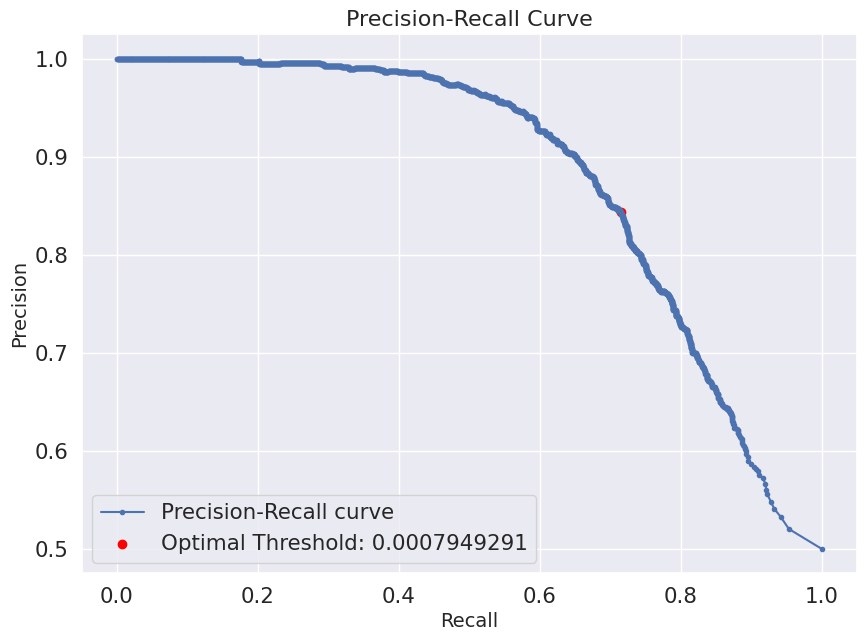

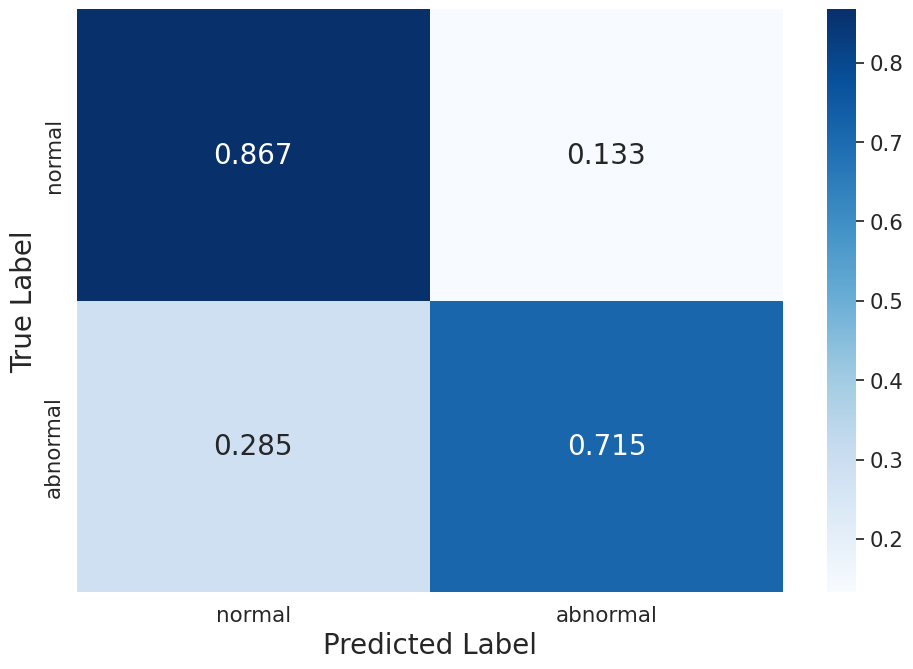

Optimal threshold: 0.0007949291
F1 Score: 0.7742132600061106
Average Precision Score: 0.8791496330527916


In [30]:
def max_f1score(actual_labels, anomaly_scores):
    precision, recall, thresholds = precision_recall_curve(actual_labels, anomaly_scores)
    f1_score =  2 * (precision * recall) / (precision + recall)

    optimal_idx = np.argmax(f1_score)
    optimal_threshold = thresholds[optimal_idx]
    predicted_labels = (anomaly_scores > optimal_threshold).astype(int)

    # Precision-Recall Curve 시각화
    plt.figure(figsize=(10, 7))
    plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
    plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', label=f'Optimal Threshold: {optimal_threshold}')
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title(f'Precision-Recall Curve', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

    return optimal_threshold, predicted_labels, f1_score[optimal_idx]

def draw_confusion_matrix(actual_labels, predicted_labels, test=False):
    cm = confusion_matrix(actual_labels, predicted_labels, normalize='true')
    plt.figure(figsize=(10, 7))
    sns.set(font_scale=1.4)
    sns.heatmap(cm, annot=True, fmt='.3f', cmap='Blues', xticklabels=['normal', 'abnormal'],
                yticklabels=['normal', 'abnormal'], annot_kws={"size":20})
    plt.xlabel('Predicted Label', fontsize=20)
    plt.ylabel('True Label', fontsize=20)

    if test:
        # plt.title(f'{/test', pad=20, fontsize=20)
        plt.tight_layout()
        plt.show()
    else:
        # plt.title(f'{', pad=20, fontsize=20)
        plt.tight_layout()
        plt.show()
    plt.show() 

def use_max_f1(test=False):
    csv_files = read_csv_files(test=test)
    actual_labels, anomaly_scores = get_labels_and_scores(csv_files)
    optimal_threshold, predicted_labels, f1 = max_f1score(actual_labels, anomaly_scores) 
    
    draw_confusion_matrix(actual_labels, predicted_labels, test)
    AUPRC = average_precision_score(actual_labels, anomaly_scores)

    print(f'Optimal threshold: {optimal_threshold}')
    print(f'F1 Score: {f1}')
    print(f'Average Precision Score: {AUPRC}')

use_max_f1(test=False)
